In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [2]:
index_filename = 'index_clean.pkl'
index_df = pd.read_pickle(index_filename)
index_df['views'] = 0
index_df.to_pickle(index_filename)

AttributeError: 'NoneType' object has no attribute 'axes'

In [4]:
index_filename = 'index_clean.pkl'
index_df = pd.read_pickle(index_filename)
index_df.head(10)

RecursionError: maximum recursion depth exceeded while calling a Python object

<AxesSubplot:xlabel='title_glove_2D_x', ylabel='title_glove_2D_y'>

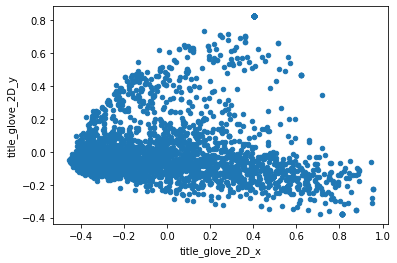

In [13]:
dim = 2
col = 'title_glove'

features = np.stack([np.array(item) for item in index_df[col]])
features = np.nan_to_num(features)

pca = PCA(n_components=dim)
pca.fit(features)

index_df[f'{col}_2D'] = index_df[col].apply(lambda x: pca.transform(x.reshape(1,-1)))
index_df[f'{col}_2D_x'] = index_df[f'{col}_2D'].apply(lambda x: x[0][0])
index_df[f'{col}_2D_y'] = index_df[f'{col}_2D'].apply(lambda x: x[0][1])
# index_df[['id','title','img_embedding', 'img_embedding_2D']].head(10)

index_df.plot.scatter(x=f'{col}_2D_x', y=f'{col}_2D_y')